In [1]:
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
df=pd.read_csv("D:\Data_Analysis\zomato.csv")
df=df.fillna(0)

In [3]:
df=df.iloc[:,1:]

In [4]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,0,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0,0,+91 8197675843,Whitefield,Bar,0,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,0,0,Whitefield,Bar,0,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Identify the most popular restaurants in the city.

In [5]:
q1=df.groupby('name').count().reset_index()
q1=q1.iloc[:,:2]
q1.rename(columns={'address':'OrderCount'},inplace=True)
q1 

,name,OrderCount
0,#FeelTheROLL,2
1,#L-81 Cafe,9
2,#Vibes Restro,3
3,#refuel,3
4,'Brahmins' Thatte Idli,1
...,...,...
8787,late100,5
8788,nu.tree,8
8789,re:cess - Hilton Bangalore Embassy GolfLinks,3
8790,repEAT Hub,2


In [6]:
q1.loc[q1['OrderCount'].idxmax()]

name          Cafe Coffee Day
OrderCount                 96
Name: 1320, dtype: object

# Identify the most popular cuisines in the city.

In [7]:
q3=df[['cuisines']]

In [8]:
q3=q3['cuisines'].str.split(',')
q3=q3.explode('cuisines').reset_index()
q3=q3.groupby('cuisines').count()

In [9]:
q3.loc[q3['index'].idxmax()]

index    12481
Name:  Chinese, dtype: int64

# Which restaurant has the highest number of votes?


In [10]:
q4=df[['name','rate','approx_cost(for two people)']]

In [11]:
q4[['Rating','Overall']]=q4['rate'].str.split("/",expand=True)

In [12]:
q4=q4[q4['Rating'].str.contains("string1/string2")==False]
q4=q4[q4['Rating'].str.contains("NEW")==False]
q4=q4[q4['Rating'].str.contains("-")==False]

In [13]:
q4.isna().sum()

name                           0
rate                           0
approx_cost(for two people)    0
Rating                         0
Overall                        0
dtype: int64

In [14]:
q4['Rating']=q4['Rating'].astype(str).astype(float)

In [15]:
Q4=q4.groupby('name').sum('Rating')
Q4.loc[Q4['Rating'].idxmax()]

Rating    374.9
Name: Onesta, dtype: float64

# Hence, Onesta restaurants have the highest number of votes.

# How many restaurants belong to each restaurant type?

In [16]:
q5=df[['rest_type']]


In [17]:
q5['rest_type']=q5['rest_type'].str.split(",")
q5=q5.explode('rest_type')
q5['Type']=q5['rest_type']

In [18]:
q5.groupby('rest_type').count()

,Type
rest_type,
Bakery,309
Bar,1302
Beverage Shop,199
Cafe,710
Casual Dining,1031
Delivery,2037
Dessert Parlor,467
Food Court,25
Irani Cafee,15


# How many restaurant take online order?

In [19]:
q6=df.drop_duplicates('name',keep='first')
q6=q6[['online_order','name']]

In [28]:
q6.groupby('online_order').count()

,name
online_order,
No,4609
Yes,4183


4,183 restaurants can take order online...

# Analyze the relationship between restaurant rating and price

In [21]:
q4['approx_cost(for two people)']=q4['approx_cost(for two people)'].str.replace(',','').astype('float')


In [22]:
q4.sort_values("Rating",ascending=True,inplace=True)

In [23]:
q4.corr()

C:\Users\Maddy\AppData\Local\Temp\ipykernel_1920\1116531936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q4.corr()


,approx_cost(for two people),Rating
approx_cost(for two people),1.000000,0.385183
Rating,0.385183,1.000000


<Axes: xlabel='Rating', ylabel='approx_cost(for two people)'>

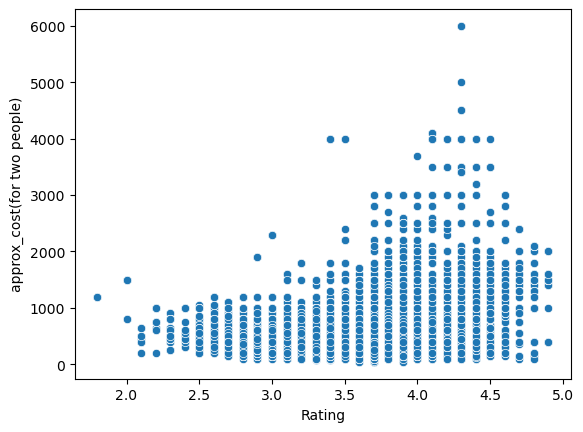

In [24]:
sns.scatterplot(data=q4,x='Rating',y='approx_cost(for two people)')

## as you can see here , slightly high rating come under costly food...

In [25]:
q4

,name,rate,approx_cost(for two people),Rating,Overall
43489,Alibi - Maya International Hotel,1.8 /5,1200.0,1.8,5
48390,Alibi - Maya International Hotel,1.8 /5,1200.0,1.8,5
12540,Alibi - Maya International Hotel,1.8/5,1200.0,1.8,5
6300,Alibi - Maya International Hotel,1.8/5,1200.0,1.8,5
38870,Alibi - Maya International Hotel,1.8 /5,1200.0,1.8,5
...,...,...,...,...,...
38457,Belgian Waffle Factory,4.9 /5,400.0,4.9,5
43055,Belgian Waffle Factory,4.9 /5,400.0,4.9,5
20314,Asia Kitchen By Mainland China,4.9/5,1500.0,4.9,5
8275,Asia Kitchen By Mainland China,4.9/5,1500.0,4.9,5
